# Imports

In [719]:
%reset -f

In [720]:
from itertools import product
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Load Data

In [721]:
df_spaceship = pd.read_csv("spaceship_titanic.csv")
df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


 ## Exploratory data analysis

In [722]:
df_spaceship.shape[0]

8693

In [723]:
df_spaceship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [724]:
df_spaceship.describe(include="object").T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


In [725]:
df_spaceship.describe(include="bool").T

,count,unique,top,freq
Transported,8693,2,True,4378


In [726]:
df_spaceship.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [727]:
uniques = [df_spaceship[col].nunique() for col in df_spaceship.columns]
pd.Series(index=df_spaceship.columns, data=uniques).sort_values(ascending=False)

PassengerId     8693
Name            8473
Cabin           6560
FoodCourt       1507
Spa             1327
VRDeck          1306
RoomService     1273
ShoppingMall    1115
Age               80
HomePlanet         3
Destination        3
CryoSleep          2
VIP                2
Transported        2
dtype: int64

In [728]:
df_spaceship.isna().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

Very small proportion of the data is missing. No rows for PassengerID or Transported are missing.

In [729]:
pd.concat([
    df_spaceship.isna().sum().rename('# Total'),
    df_spaceship.isna().mean().rename('% Total'),
], axis=1)

,# Total,% Total
PassengerId,0,0.000000
HomePlanet,201,0.023122
CryoSleep,217,0.024963
Cabin,199,0.022892
Destination,182,0.020936
Age,179,0.020591
VIP,203,0.023352
RoomService,181,0.020821
FoodCourt,183,0.021051
ShoppingMall,208,0.023927


In [730]:
df_transported_distribution = pd.concat([
    df_spaceship['Transported'].value_counts(),
    df_spaceship['Transported'].value_counts(normalize=True).round(4) * 100,
], axis=1)
df_transported_distribution

,count,proportion
Transported,,
True,4378,50.36
False,4315,49.64


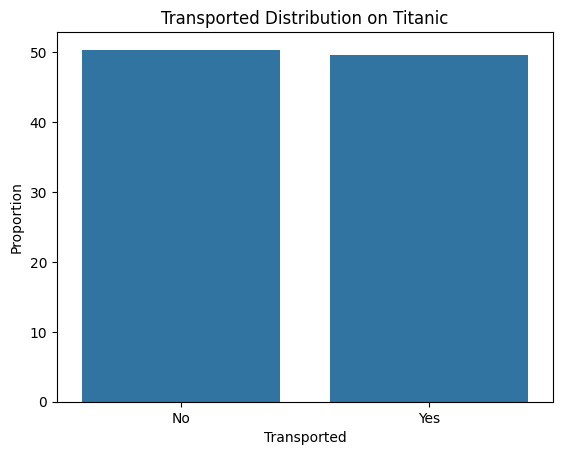

In [731]:
plt.title('Transported Distribution on Titanic')
plt.xlabel('Transported')
plt.ylabel('Proportion')

sns.barplot(
    data=df_transported_distribution,
    x=['No', 'Yes'],
    y='proportion',
);

The proportion for Transported and not Transported passengers is even.

In [732]:
df_sleep_distribution = pd.concat([
    df_spaceship['CryoSleep'].value_counts(dropna=False),
    df_spaceship['CryoSleep'].value_counts(dropna=False, normalize=True).round(4) * 100,
], axis=1)
df_sleep_distribution

,count,proportion
CryoSleep,,
False,5439,62.57
True,3037,34.94
NaN,217,2.50


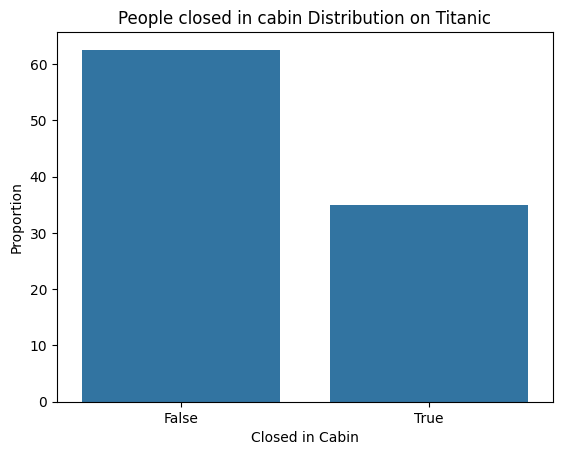

In [733]:
plt.title('People closed in cabin Distribution on Titanic')
plt.xlabel('Closed in Cabin')
plt.ylabel('Proportion')

sns.barplot(data=df_sleep_distribution, x=df_sleep_distribution.index, y='proportion');

In [734]:
transported_cryosleep = pd.crosstab(df_spaceship['Transported'], df_spaceship['CryoSleep'], dropna=False, margins=True, normalize=True).T
transported_cryosleep

Transported,False,True,All
CryoSleep,,,
False,0.419878,0.205798,0.641694
True,0.063729,0.285632,0.358306
NaN,0.012769,0.012194,0.000000
All,0.496376,0.503624,1.000000


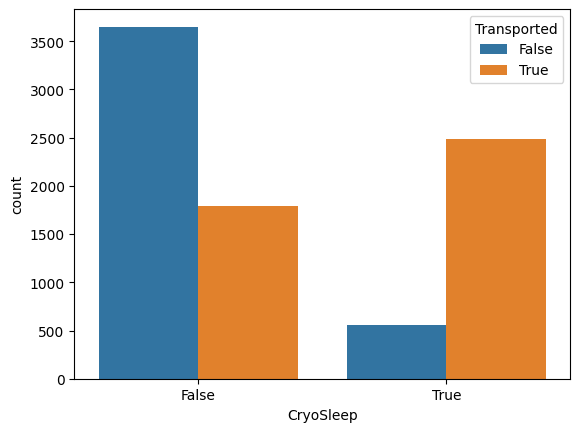

In [735]:
sns.countplot(data=df_spaceship, x='CryoSleep', hue='Transported');

Passengers who were locked in their cabin while sleeping have a higher chance of being transported to another dimension.

In [736]:
df_destination_distribution = pd.concat([
    df_spaceship['Destination'].value_counts(dropna=False),
    df_spaceship['Destination'].value_counts(dropna=False, normalize=True).round(4) * 100,
], axis=1)
df_destination_distribution

,count,proportion
Destination,,
TRAPPIST-1e,5915,68.04
55 Cancri e,1800,20.71
PSO J318.5-22,796,9.16
NaN,182,2.09


Most passengers were travelling to TRAPPIST-1e.

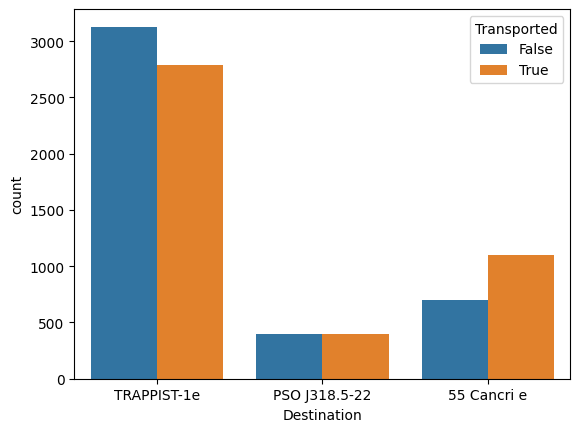

In [737]:
sns.countplot(data=df_spaceship, x='Destination', hue='Transported');

Most passengers who were travelling to 55 Cancri e were transported.

In [738]:
df_VIP_distribution = pd.concat([
    df_spaceship['VIP'].value_counts(dropna=False),
    df_spaceship['VIP'].value_counts(dropna=False, normalize=True).round(4) * 100,
], axis=1)
df_VIP_distribution

,count,proportion
VIP,,
False,8291,95.38
NaN,203,2.34
True,199,2.29


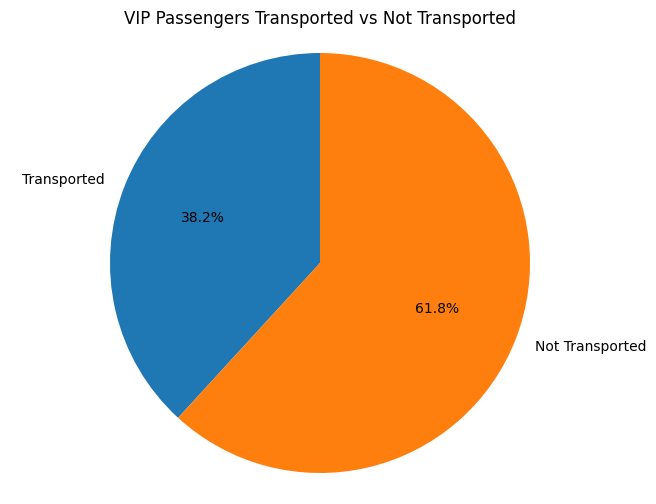

In [739]:
num_vip_passengers = df_spaceship[df_spaceship['VIP'] == 1].shape[0]
num_vip_transported = df_spaceship[(df_spaceship['VIP'] == 1) & (df_spaceship['Transported'] == True)].shape[0]
percentage_vip_transported = (num_vip_transported / num_vip_passengers) * 100
labels = ['Transported', 'Not Transported']
sizes = [num_vip_transported, num_vip_passengers - num_vip_transported]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('VIP Passengers Transported vs Not Transported')
plt.axis('equal')
plt.show()

Being a VIP passenger makes the passenger more likely to not be transported.

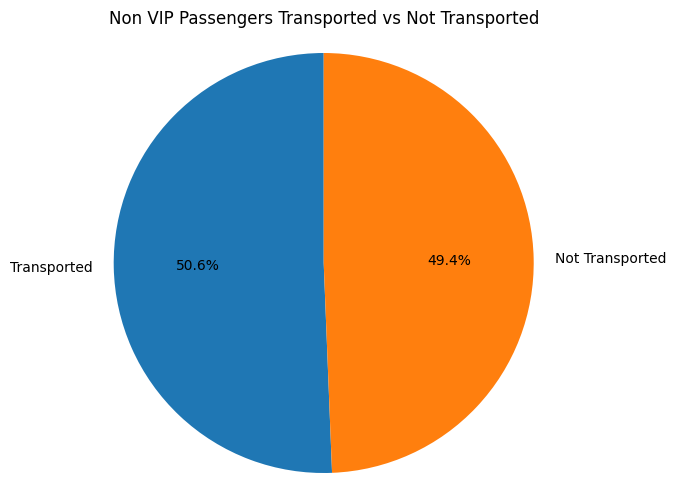

In [740]:
num_not_vip_passengers = df_spaceship[df_spaceship['VIP'] == 0].shape[0]
num_not_vip_transported = df_spaceship[(df_spaceship['VIP'] == 0) & (df_spaceship['Transported'] == True)].shape[0]
percentage_not_vip_transported = (num_not_vip_transported / num_vip_passengers) * 100
labels = ['Transported', 'Not Transported']
sizes = [num_not_vip_transported, num_not_vip_passengers - num_not_vip_transported]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Non VIP Passengers Transported vs Not Transported')
plt.axis('equal')
plt.show()

Being a Non VIP Passengers means the passenger has equal chance of being transported or not.

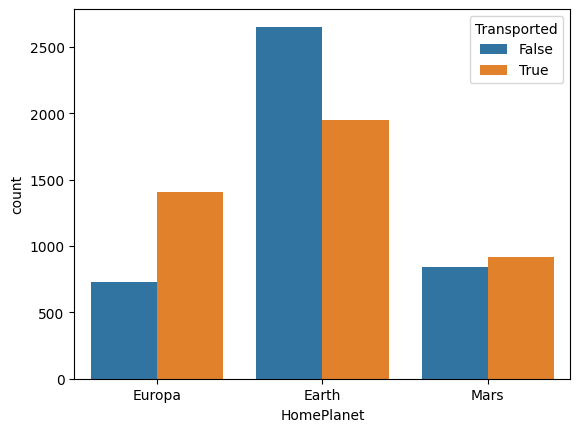

In [741]:
sns.countplot(data=df_spaceship, x='HomePlanet', hue='Transported');

Most people from Europa were transported, people from Earth were less likely to be transported

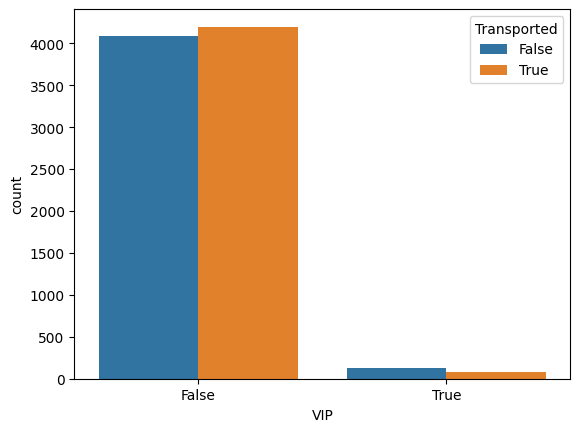

In [742]:
sns.countplot(data=df_spaceship, x='VIP', hue='Transported');

Almost all passengers were not VIP => VIP doesn't really affect the Transported feature, because being non VIP means the passenger has 50% chance of being transported.

In [743]:
df_spaceship["Deck"] = df_spaceship["Cabin"].str.split("/", expand=True)[0]
df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E


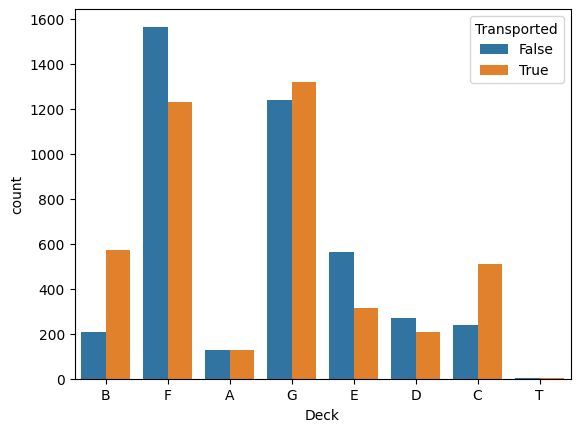

In [744]:
sns.countplot(data=df_spaceship, x='Deck', hue='Transported');

For now there is reason to assume that passengers in Deck B and deck C have a higher chance of being transported, while in F, D and E the majority of passengers were not transported.

In [745]:
cross_table = pd.crosstab(df_spaceship["Deck"], df_spaceship["Transported"])
print(cross_table)

Transported  False  True 
Deck                     
A              129    127
B              207    572
C              239    508
D              271    207
E              563    313
F             1565   1229
G             1238   1321
T                4      1


In [746]:
df_spaceship['Side'] = df_spaceship["Cabin"].str.split("/", expand=True)[2].map({'S': 'Right', 'P': 'Left'})
df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,Left
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,Right
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,Right
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,Right
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,Left
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,Right
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,Right
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,Right


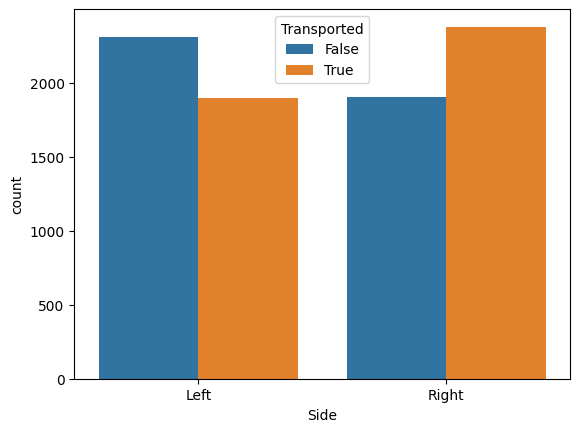

In [747]:
sns.countplot(data=df_spaceship, x=df_spaceship['Side'], hue='Transported');

Passengers from Right side of ship have a higher chance of being transported

In [748]:
df_spaceship['Luxury'] = df_spaceship['RoomService'] + df_spaceship['FoodCourt'] + df_spaceship['ShoppingMall'] + df_spaceship['Spa'] + df_spaceship['VRDeck']
df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Luxury
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,Left,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,Right,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,Right,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,Right,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,Right,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,Left,8536.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,Right,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,Right,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,Right,4637.0


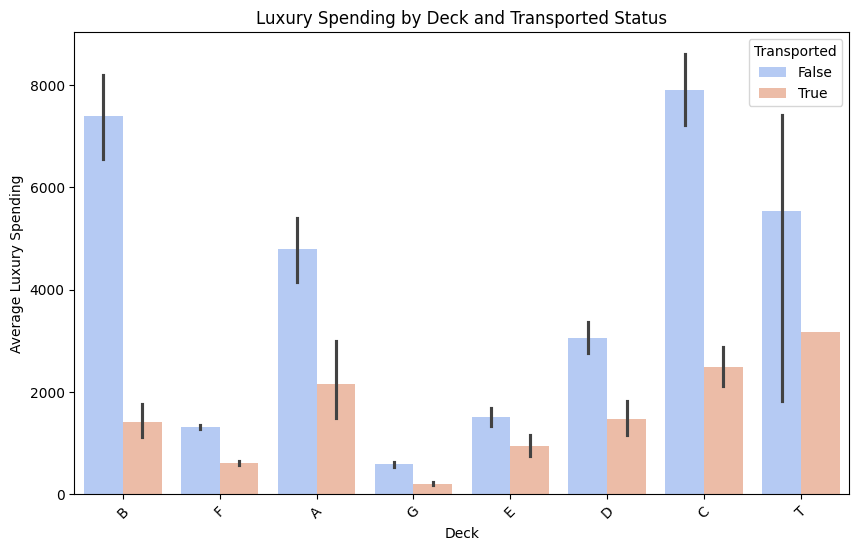

In [749]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Deck', y='Luxury', hue='Transported', data=df_spaceship, palette='coolwarm')
plt.title('Luxury Spending by Deck and Transported Status')
plt.xlabel('Deck')
plt.ylabel('Average Luxury Spending')
plt.xticks(rotation=45)
plt.legend(title='Transported', loc='upper right')
plt.show()


Though being in deck B or C suggests the passenger being transported, passengers who have spent more money an have stayed in these decks have not been transported

In [750]:
top = df_spaceship['Luxury'].quantile(0.75)
top

1486.0

Mutual information

In [751]:
def mutual_information(df: pd.DataFrame, column_source: str, column_target: str) -> float:
    df = df.copy()
    df[column_source] = df[column_source].fillna('NA')
    
    df_crosstab = pd.crosstab(df[column_source], df[column_target], dropna=False, margins=True, normalize=True)
    values_column_source = df[column_source].unique()
    values_column_target = df[column_target].unique()
    
    mi = 0
    for x in values_column_source:
        for y in values_column_target:
            p_x_y = df_crosstab.at[x, y]
            p_x = df_crosstab.at[x, 'All']
            p_y = df_crosstab.at['All', y]
            
            if p_x_y != 0 and p_x != 0 and p_y != 0:
                mi += p_x_y * np.log2(p_x_y / (p_x * p_y))

    return mi

In [752]:
categorial_values = df_spaceship.select_dtypes(include='object').columns.tolist()
mis = [mutual_information(df_spaceship, col, 'Transported') for col in categorial_values]
pd.Series(index=categorial_values, data=mis).sort_values(ascending=False)

PassengerId    0.999962
Name           0.974886
Cabin          0.782444
CryoSleep      0.163824
Deck           0.033409
HomePlanet     0.027312
Destination    0.008889
Side           0.007604
VIP            0.001013
dtype: float64

In [753]:
def chi_square(df: pd.DataFrame, column_source: str, column_target: str) -> float:
    df = df.copy()
    
    df[column_source] = df[column_source].fillna('NA')
    
    df_crosstab = pd.crosstab(df[column_source], df[column_target], dropna=False, margins=True)
    
    values_column_source = df[column_source].unique()
    values_column_target = df[column_target].unique()
    
    chi_sq = 0
    
    for x in values_column_source:
        for y in values_column_target:
            subtr = df_crosstab.at[x, 'All'] * df_crosstab.at['All', y] / df_crosstab.at['All', 'All']
            chi_sq += (df_crosstab.at[x, y] - subtr)**2 / subtr

    degrees_of_freedom = (len(values_column_source) - 1) * (len(values_column_target) - 1)
    return 1 - scipy.stats.chi2.cdf(chi_sq, degrees_of_freedom)

In [754]:
chi_sqs = [chi_square(df_spaceship, col, 'Transported') for col in categorial_values]
pd.Series(index=categorial_values, data=chi_sqs).sort_values(ascending=False)

PassengerId    0.494957
Name           0.491803
Cabin          0.006198
VIP            0.002361
HomePlanet     0.000000
CryoSleep      0.000000
Destination    0.000000
Deck           0.000000
Side           0.000000
dtype: float64

Obvoiusly Name and PassengerID don't affect whether or not they were Transported. 

In [755]:
df_spaceship['age_binned'] = pd.cut(df_spaceship['Age'], 3, labels=['young', 'middle-aged', 'elder']).astype(str)
df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Luxury,age_binned
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,Left,0.0,middle-aged
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,Right,736.0,young
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,Right,10383.0,elder
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,Right,5176.0,middle-aged
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,Right,1091.0,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,Left,8536.0,middle-aged
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,Right,0.0,young
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,Right,1873.0,young
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,Right,4637.0,middle-aged


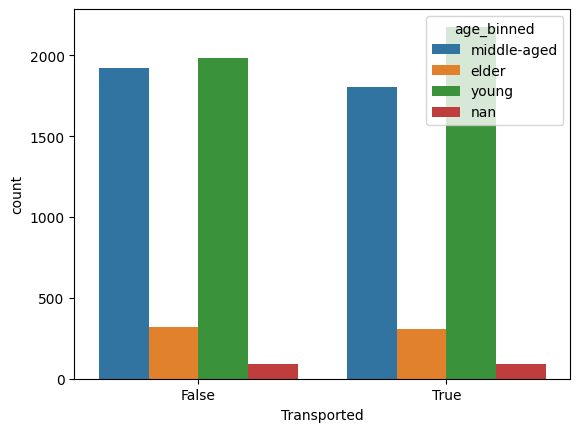

In [756]:
sns.countplot(data=df_spaceship, x='Transported', hue='age_binned');

<Axes: xlabel='Transported', ylabel='Age'>

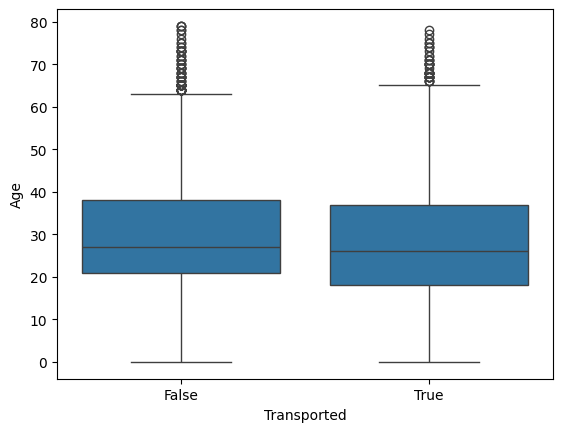

In [757]:
sns.boxplot(x='Transported',y='Age',data=df_spaceship)

Most people are between the ages of 20 and 40, we have outliers - people over the age of 60; The age does't matter when determining whether they were transported.

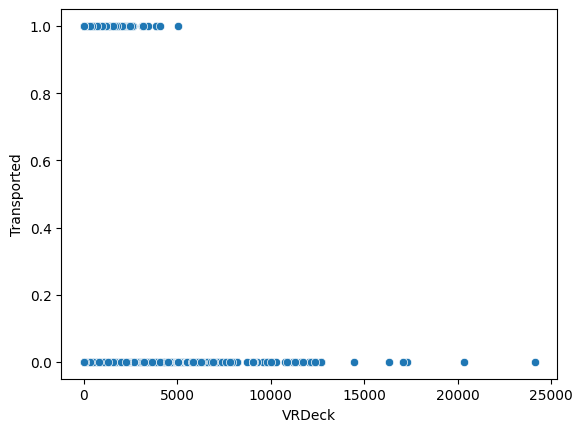

In [758]:
sns.scatterplot(data=df_spaceship, x="VRDeck", y="Transported");

In [759]:
numerical = ["ShoppingMall", "FoodCourt", "Spa", "RoomService","VRDeck" ,"Transported"]


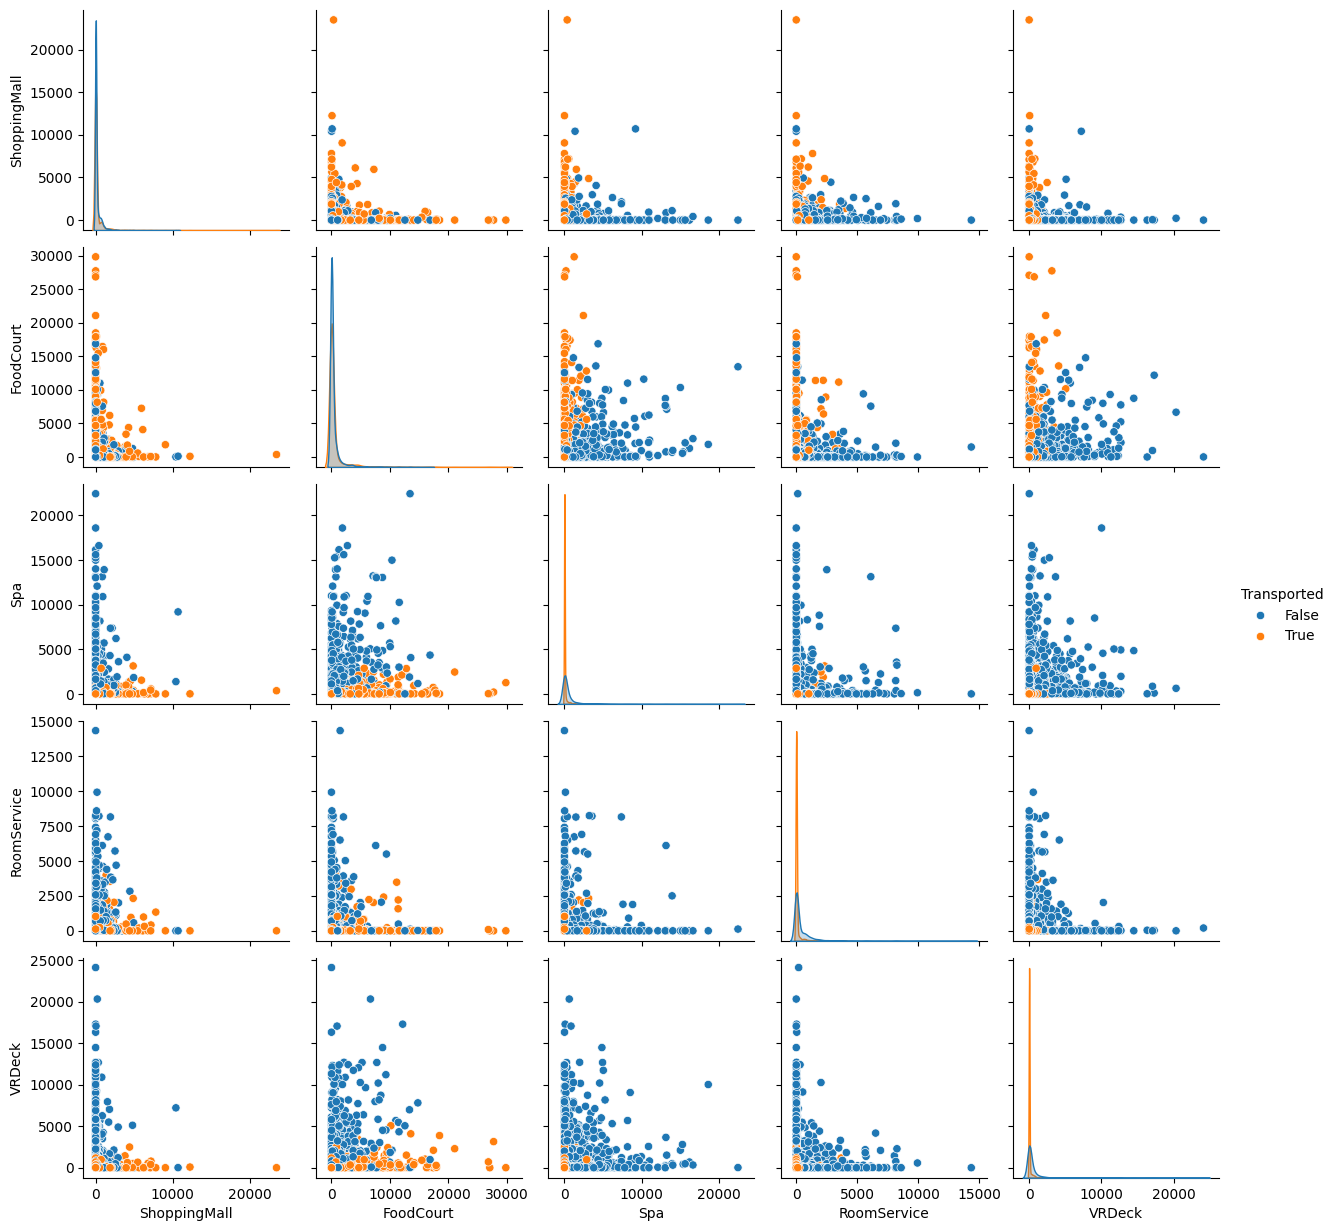

In [760]:
sns.pairplot(df_spaceship[numerical], hue="Transported")


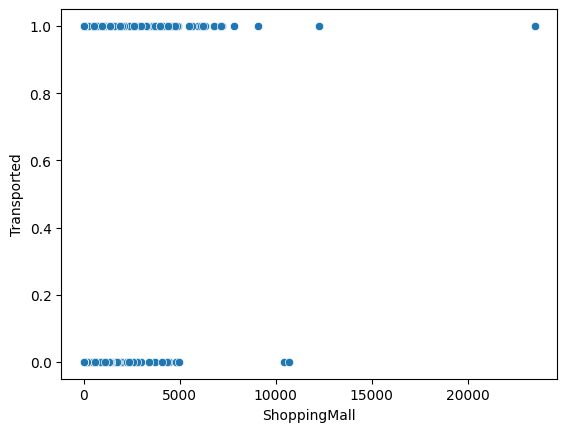

In [761]:
sns.scatterplot(data=df_spaceship, x="ShoppingMall", y="Transported");

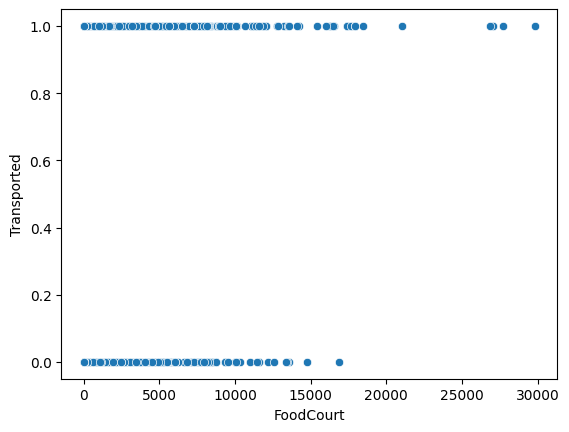

In [762]:
sns.scatterplot(data=df_spaceship, x="FoodCourt", y="Transported");

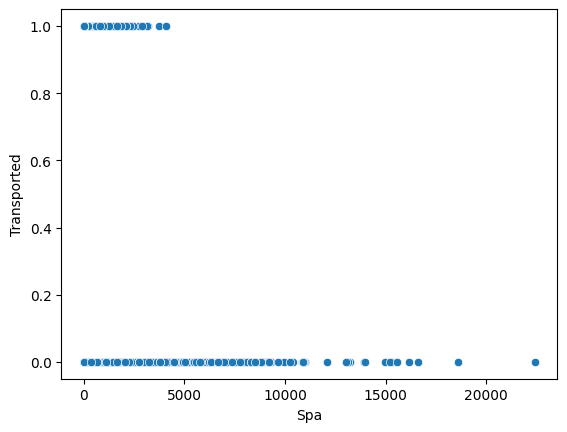

In [763]:
sns.scatterplot(data=df_spaceship, x="Spa", y="Transported");

<Axes: >

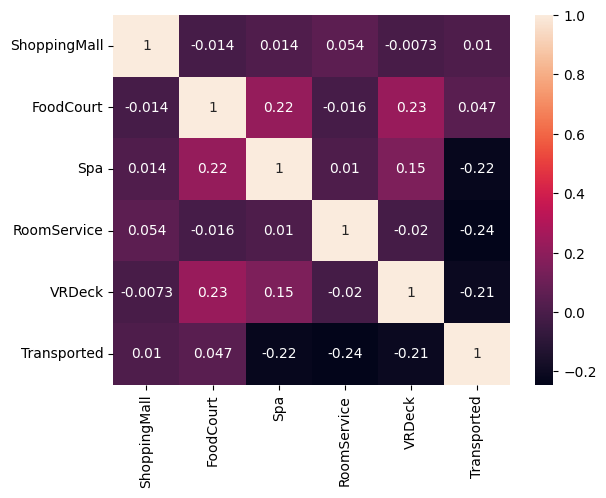

In [764]:
sns.heatmap(df_spaceship[numerical].corr(),annot=True)

Overall the links are weak, however
* Less money spent on Spa, RoomService, VRDeck => a bit less likely to be transported
* More money spent on VRDeck => more money spent on FoodCourt (and vice versa)
* More money spent on Spa => more money spent on FoodCourt (and vice versa)

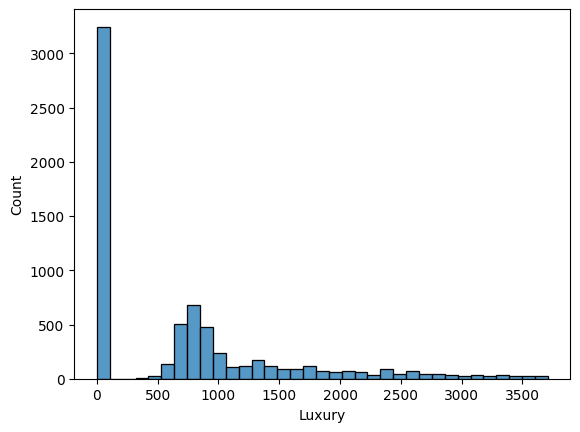

In [765]:
Q1 = df_spaceship['Luxury'].quantile(0.25)
Q3 = df_spaceship['Luxury'].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_filtered = df_spaceship[(df_spaceship['Luxury'] >= lower_bound) & (df_spaceship['Luxury'] <= upper_bound)]

ax = sns.histplot(df_filtered['Luxury'].astype(float))

Most people haven't spent money on any luxuries. If they have - generally they have spent around 500 - 1000. Small part of passangers spent more than this.

In [766]:
df_spaceship = df_spaceship.drop('age_binned', axis=1)
cat_features = df_spaceship.select_dtypes('object').columns.drop(['PassengerId', 'Cabin', 'Name'])
cat_features

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side'], dtype='object')

C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\55005808.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\55005808.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\55005808.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\55005808.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\55005808.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\55005808.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


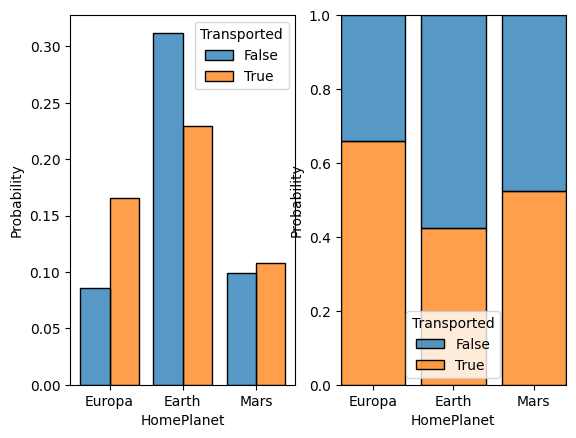

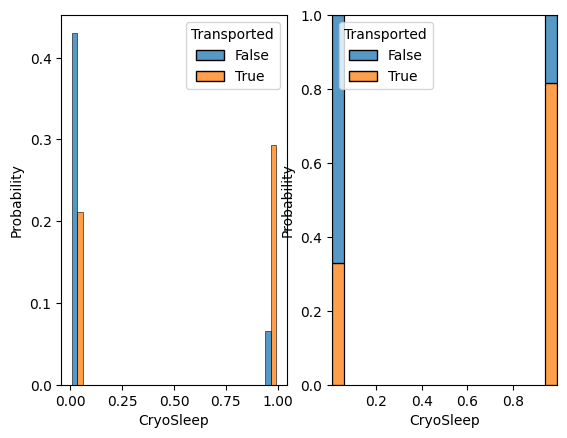

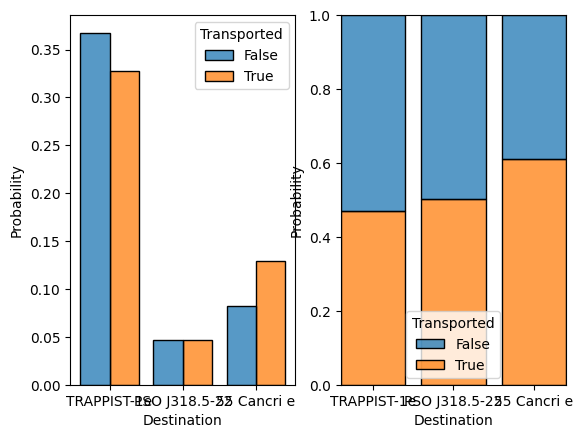

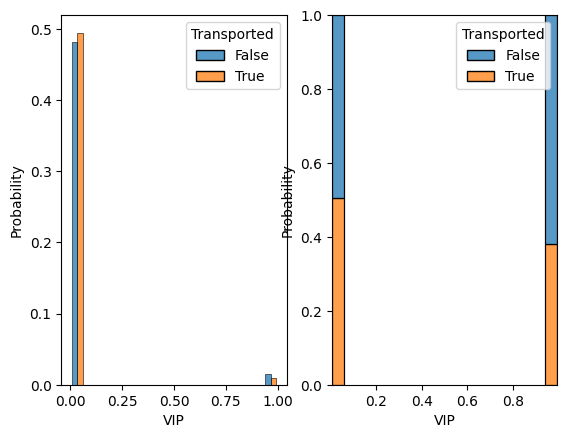

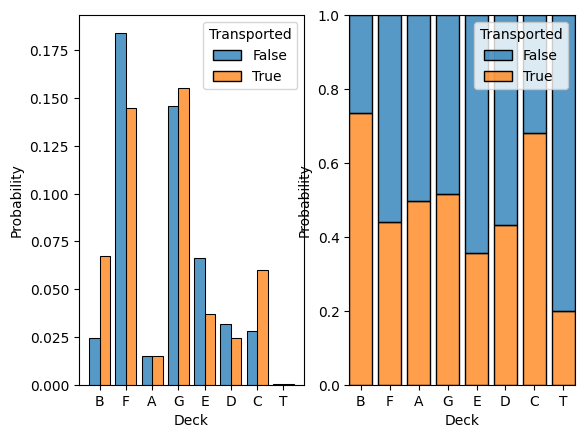

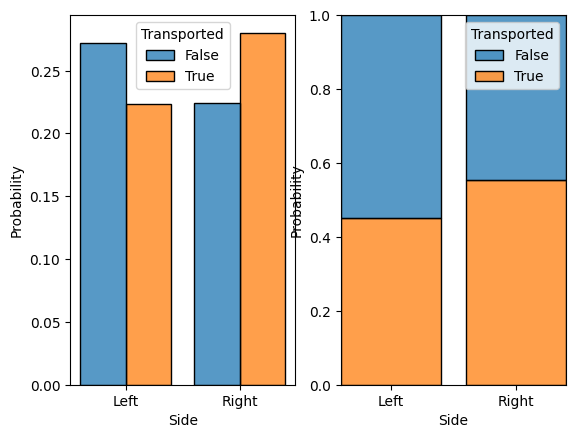

In [767]:
for col in cat_features:
  fig, ax = plt.subplots(1,2)
  ax1 = sns.histplot(data=df_spaceship, x=col, hue="Transported", stat="probability", multiple="dodge", shrink=.8, ax=ax[0])
  ax2 = sns.histplot(data=df_spaceship, x=col, hue="Transported", stat="probability", multiple="fill", shrink=.8, ax=ax[1])
  fig.show()

## Generalization
* Passengers from Europa have a higher chance of being transported, passenger from Earth have a highet chance of NOT being transported
* Passengers who were locked sleeping in their cabin have a higher chance of being transported
* Destination doesn't really influence being transported or not
* Vip passengers have a higher chance of NOT being transported, however the number of VIP passengers is very small.
* Passengers from Decks B and C are more likely to be transported
* Passengers from the Right side of the ship are more likely to be transported 

Transform Categorical
 

In [768]:
df_spaceship['Side'] = df_spaceship['Side'].map({'Right': 1, 'Left':2})
df_spaceship['HomePlanet'] = df_spaceship['HomePlanet'].map({'Earth': 1, 'Europa': 2, 'Mars' : 3})
df_spaceship['Deck'] = df_spaceship['Deck'].map({'A': 1, 'B': 2, 'C':3,'D':4,'E':5,'F':6,'G':7})
df_spaceship['Destination'] = df_spaceship['Destination'].map({'TRAPPIST-1e':1, '55 Cancri e': 2, 'PSO J318.5-22':3})
df_spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Luxury
0,0001_01,2.0,False,B/0/P,1.0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,2.0,2.0,0.0
1,0002_01,1.0,False,F/0/S,1.0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,6.0,1.0,736.0
2,0003_01,2.0,False,A/0/S,1.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,1.0,10383.0
3,0003_02,2.0,False,A/0/S,1.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,1.0,5176.0
4,0004_01,1.0,False,F/1/S,1.0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,6.0,1.0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,2.0,False,A/98/P,2.0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1.0,2.0,8536.0
8689,9278_01,1.0,True,G/1499/S,3.0,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,7.0,1.0,0.0
8690,9279_01,1.0,False,G/1500/S,1.0,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,7.0,1.0,1873.0
8691,9280_01,2.0,False,E/608/S,2.0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,5.0,1.0,4637.0


<Axes: >

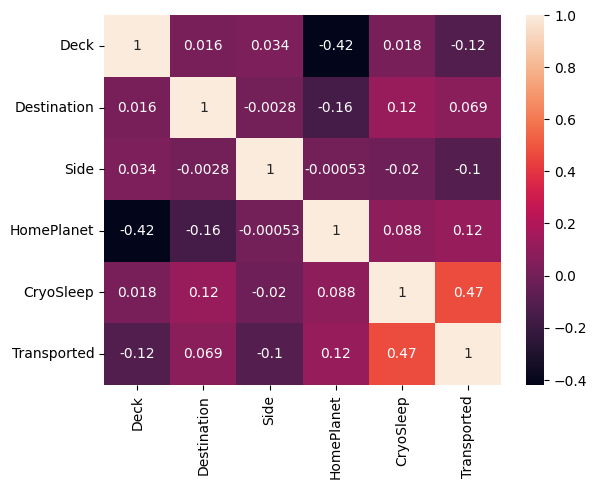

In [769]:
sns.heatmap(df_spaceship[["Deck","Destination","Side","HomePlanet", "CryoSleep","Transported"]].corr(),annot=True)

Deck and Home Planet are correlated

# Modelling

In [773]:
df_results = pd.DataFrame(
    columns=['experiment', 'accuracy', 'precision', 'recall', 'f1-score', 'log_loss']
)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss


Data preparation

In [774]:
df_spaceship = df_spaceship.dropna()
X = df_spaceship[["ShoppingMall", "FoodCourt", "Spa", "RoomService","VRDeck", "CryoSleep", "HomePlanet"]]
# imputer = SimpleImputer(strategy="mean")
# imputed_X = imputer.fit_transform(X)
# X = imputed_X
y = df_spaceship['Transported']


In [775]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


## Random


In [776]:
y_pred = np.random.choice(y_test, y_test.shape[0])
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test,y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

       False       0.48      0.46      0.47       649
        True       0.50      0.52      0.51       672

    accuracy                           0.49      1321
   macro avg       0.49      0.49      0.49      1321
weighted avg       0.49      0.49      0.49      1321



C:\Users\GLOBAL\AppData\Local\Temp\ipykernel_16620\1739335101.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({


,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035


## Most Common

In [777]:
y_pred = np.zeros_like(y_test)
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['most_frequent'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test,y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

       False       0.49      1.00      0.66       649
        True       0.00      0.00      0.00       672

    accuracy                           0.49      1321
   macro avg       0.25      0.50      0.33      1321
weighted avg       0.24      0.49      0.32      1321



c:\Users\GLOBAL\Desktop\UNI\3 kurs\6 semester\ds\HW1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GLOBAL\Desktop\UNI\3 kurs\6 semester\ds\HW1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GLOBAL\Desktop\UNI\3 kurs\6 semester\ds\HW1\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606


## Logistic Regression

In [778]:
logreg_noscale = LogisticRegression(random_state=101)

logreg_noscale.fit(X_train, y_train)

y_pred = logreg_noscale.predict(X_test)
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['log_reg'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test,y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

       False       0.80      0.76      0.78       649
        True       0.78      0.82      0.80       672

    accuracy                           0.79      1321
   macro avg       0.79      0.79      0.79      1321
weighted avg       0.79      0.79      0.79      1321



,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980


In [779]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [780]:
logreg_scale = LogisticRegression(random_state=101)

# fit the model with data
logreg_scale.fit(scaled_X_train, y_train)

y_pred = logreg_scale.predict(scaled_X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['scaled_log_reg'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test,y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551


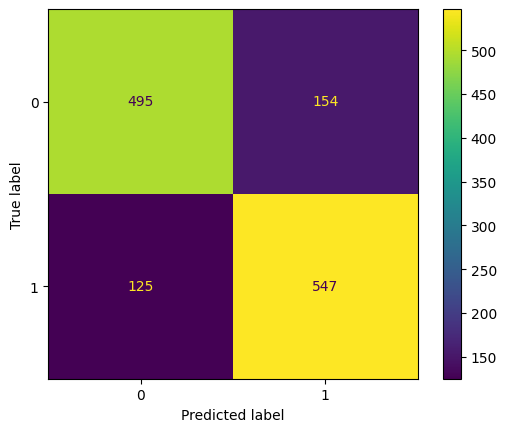

In [781]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## KNN Model

In [653]:
df_spaceship = df_spaceship.dropna()
X = df_spaceship[[ "ShoppingMall", "FoodCourt","Spa", "RoomService","VRDeck", "CryoSleep", "HomePlanet","Age"]]

y = df_spaceship['Transported']

In [782]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [785]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

In [786]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['knn'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test,y_pred)]
})], ignore_index=True)
df_results


,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844


## SVM

In [787]:
SVCmodel = SVC()
SVCmodel.fit(X_train, y_train)

SVC()

In [788]:
y_pred = SVCmodel.predict(X_test)
y_pred

array([False, False,  True, ...,  True,  True,  True])

In [789]:
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['svm'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test,y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989


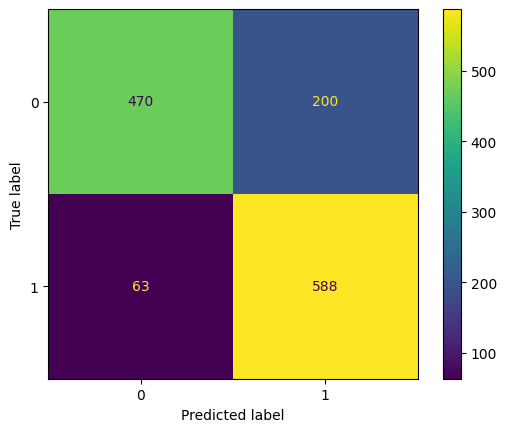

In [790]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Decision Tree

In [791]:
df_spaceship = df_spaceship.dropna()
X = df_spaceship[[ "ShoppingMall", "FoodCourt","Spa", "RoomService","VRDeck", "CryoSleep", "HomePlanet", "Age"]]
y = df_spaceship['Transported']

In [792]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['decision_tree_default_args'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947


In [793]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['decision_tree_max_depth_3'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361


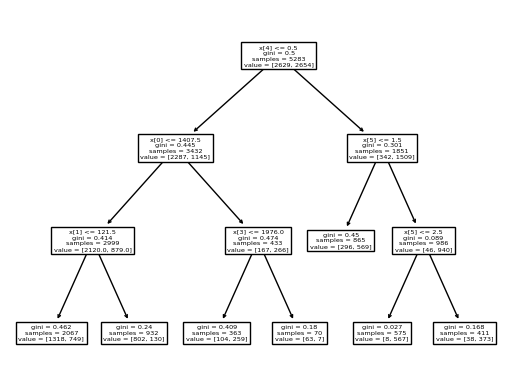

In [680]:
ax = plot_tree(dt)

In [796]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['decision_tree_max_depth_3_entropy'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361
8,decision_tree_max_depth_3_entropy,0.752460,0.834711,0.620584,0.711894,8.922237


In [797]:
df = pd.DataFrame()
df['column'] = X_train.columns
df['importance'] = dt.feature_importances_
df = df.sort_values(by='importance', ascending=False)
df

,column,importance
5,CryoSleep,0.585669
6,HomePlanet,0.177388
3,RoomService,0.114521
2,Spa,0.089845
1,FoodCourt,0.032577
0,ShoppingMall,0.000000
4,VRDeck,0.000000


<Axes: title={'center': 'Most important features'}, xlabel='importance', ylabel='column'>

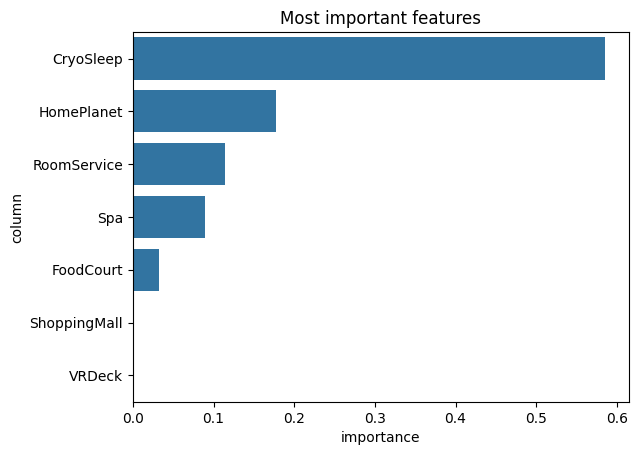

In [798]:
plt.title('Most important features')
sns.barplot(x='importance', y='column', data=df.iloc[:10], orient='h')

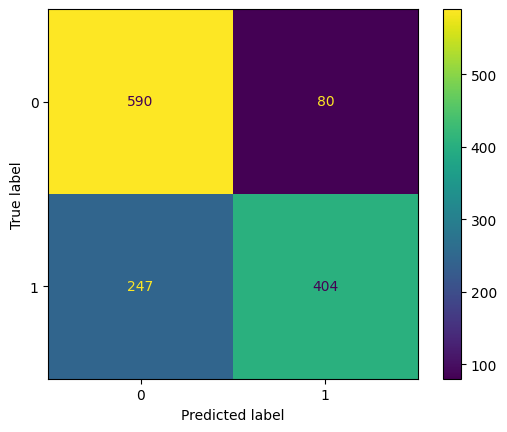

In [799]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [800]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['decision_tree_max_depth_7_min_samples_leaft_3'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361
8,decision_tree_max_depth_3_entropy,0.752460,0.834711,0.620584,0.711894,8.922237
9,decision_tree_max_depth_7_min_samples_leaft_3,0.792581,0.748353,0.872504,0.805674,7.476125


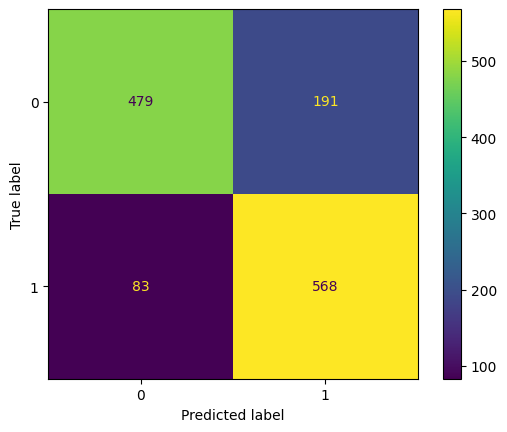

In [801]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [802]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = dt.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random_forest_n_estimators_100'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361
8,decision_tree_max_depth_3_entropy,0.752460,0.834711,0.620584,0.711894,8.922237
9,decision_tree_max_depth_7_min_samples_leaft_3,0.792581,0.748353,0.872504,0.805674,7.476125


In [803]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random_forest_n_estimators_50'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361
8,decision_tree_max_depth_3_entropy,0.752460,0.834711,0.620584,0.711894,8.922237
9,decision_tree_max_depth_7_min_samples_leaft_3,0.792581,0.748353,0.872504,0.805674,7.476125


In [804]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random_forest_n_estimators_150'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361
8,decision_tree_max_depth_3_entropy,0.752460,0.834711,0.620584,0.711894,8.922237
9,decision_tree_max_depth_7_min_samples_leaft_3,0.792581,0.748353,0.872504,0.805674,7.476125


In [699]:
criterions = ['gini', 'entropy']
n_estimators = [10, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5, 10, 20]

scores = {}

for n, f, d, c in product(n_estimators, max_features, max_depths, criterions):
  rf = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d, n_jobs=-1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  f1 = f1_score(y_test, y_pred)
  scores[(n, f, d, c)] = f1
  print(f'f1 for {n, f, d, c}: {f1:.2f}')

best_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
best_scores

f1 for (10, 1, None, 'gini'): 0.78
f1 for (10, 1, None, 'entropy'): 0.79
f1 for (10, 1, 2, 'gini'): 0.73
f1 for (10, 1, 2, 'entropy'): 0.69
f1 for (10, 1, 3, 'gini'): 0.73
f1 for (10, 1, 3, 'entropy'): 0.76
f1 for (10, 1, 4, 'gini'): 0.74
f1 for (10, 1, 4, 'entropy'): 0.77
f1 for (10, 1, 5, 'gini'): 0.76
f1 for (10, 1, 5, 'entropy'): 0.76
f1 for (10, 1, 10, 'gini'): 0.80
f1 for (10, 1, 10, 'entropy'): 0.79
f1 for (10, 1, 20, 'gini'): 0.80
f1 for (10, 1, 20, 'entropy'): 0.80
f1 for (10, 'sqrt', None, 'gini'): 0.80
f1 for (10, 'sqrt', None, 'entropy'): 0.80
f1 for (10, 'sqrt', 2, 'gini'): 0.74
f1 for (10, 'sqrt', 2, 'entropy'): 0.76
f1 for (10, 'sqrt', 3, 'gini'): 0.76
f1 for (10, 'sqrt', 3, 'entropy'): 0.74
f1 for (10, 'sqrt', 4, 'gini'): 0.78
f1 for (10, 'sqrt', 4, 'entropy'): 0.76
f1 for (10, 'sqrt', 5, 'gini'): 0.79
f1 for (10, 'sqrt', 5, 'entropy'): 0.79
f1 for (10, 'sqrt', 10, 'gini'): 0.81
f1 for (10, 'sqrt', 10, 'entropy'): 0.81
f1 for (10, 'sqrt', 20, 'gini'): 0.79
f1 for (10, '

[((100, 'sqrt', 10, 'gini'), 0.8185654008438819),
 ((50, 'log2', 10, 'entropy'), 0.8176011355571328),
 ((50, 'log2', 10, 'gini'), 0.8175388967468176),
 ((150, 'log2', 10, 'gini'), 0.8163265306122449),
 ((200, 1, 10, 'gini'), 0.8156583629893238),
 ((150, 1, 10, 'entropy'), 0.8148148148148148),
 ((200, 'sqrt', 10, 'gini'), 0.8146582100070472),
 ((150, 'log2', 10, 'entropy'), 0.8146067415730337),
 ((150, 'sqrt', 10, 'entropy'), 0.8143966125617502),
 ((100, 1, 10, 'entropy'), 0.8142857142857143),
 ((50, 1, 10, 'gini'), 0.8142348754448399),
 ((150, 'sqrt', 10, 'gini'), 0.8137737174982431),
 ((100, 'log2', 10, 'gini'), 0.8135116115411682),
 ((10, 'sqrt', 10, 'gini'), 0.8132487667371389),
 ((200, 'log2', 10, 'gini'), 0.8132022471910112),
 ((200, 'log2', 10, 'entropy'), 0.8132022471910112),
 ((200, 1, 10, 'entropy'), 0.8131241084165478),
 ((100, 'log2', 10, 'entropy'), 0.8129851799576571),
 ((50, 'sqrt', 10, 'entropy'), 0.8128941836019622),
 ((200, 'sqrt', 10, 'entropy'), 0.8126760563380282),


Random forests do slightly better than single decision tree - f1 score of 81 is achievable.

In [805]:
# f1 for (10, 'sqrt', 10, 'gini'): 0.81
rf = RandomForestClassifier(n_estimators=10, max_features='sqrt',max_depth=10, criterion='gini')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random_forest_final'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)],
    'log_loss': [log_loss(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score,log_loss
0,random,0.492808,0.501433,0.520833,0.510949,18.281035
1,most_frequent,0.491294,0.000000,0.000000,0.000000,18.335606
2,log_reg,0.790310,0.780142,0.818452,0.798838,7.557980
3,scaled_log_reg,0.788796,0.780314,0.813988,0.796795,7.612551
4,knn,0.798637,0.753623,0.878648,0.811348,7.257844
5,svm,0.800908,0.746193,0.903226,0.817234,7.175989
6,decision_tree_default_args,0.747918,0.697761,0.861751,0.771134,9.085947
7,decision_tree_max_depth_3,0.728236,0.665158,0.903226,0.766124,9.795361
8,decision_tree_max_depth_3_entropy,0.752460,0.834711,0.620584,0.711894,8.922237
9,decision_tree_max_depth_7_min_samples_leaft_3,0.792581,0.748353,0.872504,0.805674,7.476125
